<a href="https://colab.research.google.com/github/nitisha-pradhan/The_Sparks_Foundation_Internship/blob/main/Task_1_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> TASK 1: Prediction using Supervised ML</h2>
<h3>Predict the percentage of an student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?</h3>

<b><h3>Author: Nitisha Pradhan</h3></b>

<h3>Importing Libraries</h3>

In [ ]:
#Importing the required libraries
#numpy for mathematical operations
#pandas for data analysis and dataframe
#matplotlib for data visualization

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
#Using the url to import the data and create the dataframe

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

<h3>Data Analysis</h3>

In [ ]:
#head() functions displays the first few rows of the data
#Similiarly, tail() displays the last few rows.

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#describe() gives various information like count, mean, etc of the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>Data Visualization</h3>

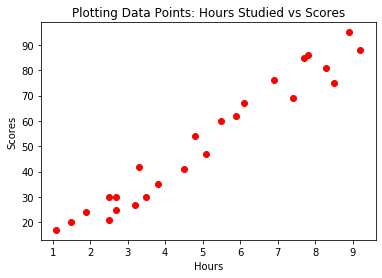

In [ ]:
#Using a scatter plot to visualize the data

#Defining the x and y
plt.scatter(x = df["Hours"], y = df["Scores"], color = "red")

#The title is displayed on top of the graph and is used to show what the graph is about
plt.title("Plotting Data Points: Hours Studied vs Scores")

#the x and y labels are used to show what is represented by them
plt.xlabel("Hours")
plt.ylabel("Scores")

#show() function will display the graph/chart
plt.show()

<h4>We can infer from the above plot that there is a linear relationship between the variables. Thus we will use Linear Regression.</h4>

In [ ]:
#Separating the data into Features(X) and Target Variable(y)

X = df.iloc[ : , : -1].values
y = df.iloc[ : , -1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

<h3>Train Test Split</h3>

In [ ]:
#We divide the data into train set and test set.
#The model is trained on the train set
#The test set is used to test the performance of the model as it is the unseen data for the model

from sklearn.model_selection import train_test_split

#test_size is kept at 0.2. This means that 80% data is in the train set and rest 20% in the test set
#random_state is used to get reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

<h3>Linear Regression Model</h3>

In [ ]:
#We train our model using Linear Regression from the sklearn library.
#LR will find a linear relationship between the X and y.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#fit() is used to train the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#the predict() is used to predict the output (y) for the test set
y_pred = lr.predict(X_test)

<h3>Visualizing Best-fit line</h3>

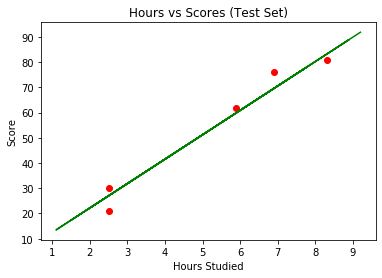

In [ ]:
#The test set has been plotted along with the best fit line.
#Note: In the second line of this block's code, we keep X_train as that has been used for training the LR model
#which gives us the unique equation of the best fit line

plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Hours vs Scores (Test Set)")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

<h4>Thus, from the above plot, we can say that the best fit line is good for prediction on the data.</h4>

In [ ]:
#Creating a dataframe for comparing the Actual vs Predicted values

df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df_test

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


<h3>Predicted score if a student studies for 9.25 hrs/ day</h3>

In [ ]:
#The model can be used to predict on self defined data as well

hours = 9.25

pred_hours = lr.predict([[hours]])
print("For {} hours, the Predicted score is {}.".format(hours, pred_hours[0]))

For 9.25 hours, the Predicted score is 92.38611528261494.


<h3>Evaluating the model</h3>

In [ ]:
#Linear Regression model's performance is checked by the use of metrics.
#MSE, MAE and R2 score have been used here as they provide a good understanding of how good our model is.
#MSE is the mean of the sum of all squared errors.
#MAE is the mean of the sum of all absolute errors
#R2 is 1 minus the sum of squares of residuals/total sum of squares. In other words..
#R2(coefficient of determination) is the percentage of the dependent variable variation that a linear model explains.

from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
R2 Score: 0.9678055545167994
